<a href="https://colab.research.google.com/github/TausifAnsari/Binary-Image-Classification/blob/master/img_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


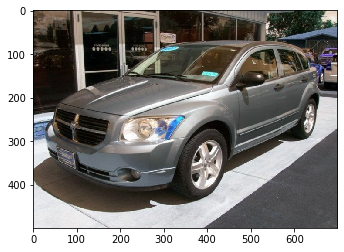

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_directory = '/content/drive/My Drive/Cars and bikes dataset/train'         # Directory of training Data
categories = ['car', 'motorbike']                                               # Categories of the training data
for category in categories:
  path = os.path.join(data_directory, category)                                 # Path for vehicle images
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))                              # Converting image to an array
    plt.imshow(img_array)
    plt.show()
    break
  break

In [4]:
print("Dimension of image : ",str(img_array.shape)+'\n')
print(img_array)  #Representation of image as array

Dimension of image :  (500, 700, 3)

[[[ 95  74  59]
  [ 94  73  58]
  [ 89  70  55]
  ...
  [216 196 178]
  [218 196 178]
  [220 198 180]]

 [[ 93  72  57]
  [ 94  75  60]
  [ 93  74  59]
  ...
  [223 203 185]
  [223 203 185]
  [225 205 187]]

 [[ 82  63  48]
  [ 86  70  54]
  [ 88  72  56]
  ...
  [228 210 193]
  [229 211 194]
  [231 213 196]]

 ...

 [[229 228 230]
  [229 228 230]
  [231 230 232]
  ...
  [ 78  75  77]
  [ 76  73  75]
  [ 75  72  74]]

 [[230 229 231]
  [229 228 230]
  [230 229 231]
  ...
  [ 73  70  72]
  [ 73  70  72]
  [ 75  72  74]]

 [[233 232 234]
  [231 230 232]
  [232 231 233]
  ...
  [ 74  71  73]
  [ 71  68  70]
  [ 70  67  69]]]


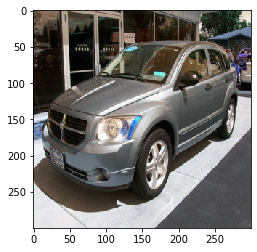

In [5]:
img_size = 300
img_new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(img_new_array)
plt.show()

In [0]:
training_data = []

def create_training_data():
  for category in categories:
    path = os.path.join(data_directory, category)                               # Path for vehicle images
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))                          # Converting image to an array
        img_new_array = cv2.resize(img_array,(img_size, img_size))              # Resize all images in training data
        training_data.append([img_new_array, class_num])                        # Append new resized images to a list
      except Exception as E:
        pass
    
create_training_data()

In [7]:
print(len(training_data))

6569


In [0]:
import random
random.shuffle(training_data)

In [0]:
features = []
labels = []

for feature,label in training_data:
  features.append(feature)
  labels.append(label)
  
features = np.array(features).reshape(-1, img_size, img_size, 3)  

In [0]:
import pickle

#Saving the processed images and labels list into files

pickle_out = open('vehicle_features', 'wb')
pickle.dump(features,pickle_out)
pickle_out.close()

pickle_out = open('vehicle_labels', 'wb')
pickle.dump(labels,pickle_out)
pickle_out.close()

In [13]:
from tensorflow import keras
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

#Training our model
history = model.fit(features,labels,batch_size=128, epochs = 10, validation_split = 0.1)

Train on 5912 samples, validate on 657 samples
Epoch 1/10
5912/5912 [==============================] - 25s 4ms/step - loss: 7.3151 - acc: 0.5399 - val_loss: 7.7279 - val_acc: 0.5205
Epoch 2/10
5912/5912 [==============================] - 24s 4ms/step - loss: 2.4609 - acc: 0.5621 - val_loss: 0.6737 - val_acc: 0.5297
Epoch 3/10
5912/5912 [==============================] - 24s 4ms/step - loss: 0.6519 - acc: 0.6879 - val_loss: 0.4893 - val_acc: 0.8295
Epoch 4/10
5912/5912 [==============================] - 24s 4ms/step - loss: 0.4477 - acc: 0.8185 - val_loss: 0.8143 - val_acc: 0.6362
Epoch 5/10
5912/5912 [==============================] - 24s 4ms/step - loss: 0.3491 - acc: 0.8752 - val_loss: 0.3440 - val_acc: 0.8782
Epoch 6/10
5912/5912 [==============================] - 24s 4ms/step - loss: 0.2288 - acc: 0.9200 - val_loss: 0.1684 - val_acc: 0.9422
Epoch 7/10
5912/5912 [==============================] - 24s 4ms/step - loss: 0.1830 - acc: 0.9340 - val_loss: 0.1193 - val_acc: 0.9543
Epoch 8/

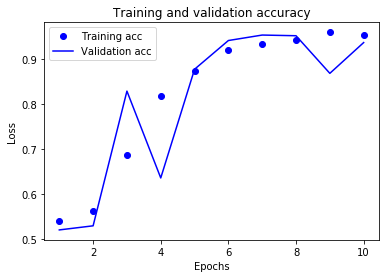

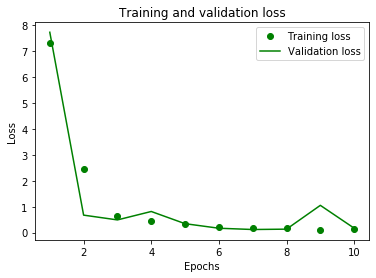

In [14]:
# Plotting binary accuracy, validation binary accuracy, loss, validation loss, 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model.save('car_model.h5')

Example : 1

	 Image of a CAR 



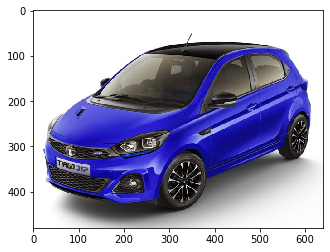




Example : 2

	 Image of a BIKE 



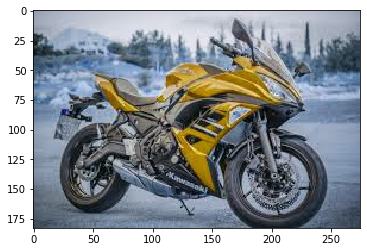

In [46]:
import cv2
import tensorflow as tf

categories = ['car', 'motorbike']


def prepare(filepath):
    img_size = 300  # 50 in txt-based
    img_array = cv2.imread(filepath,)
    img_new_array = cv2.resize(img_array, (img_size, img_size))
    return img_new_array.reshape(-1, img_size, img_size, 3)


model = tf.keras.models.load_model("car_model.h5")

test_img = '/content/car.jpg'
prediction = model.predict([prepare(test_img)])

print("Example : 1\n")
if prediction <= 0.5:
  print("\t Image of a CAR \n")
elif prediction > 0.5:
  print("\t Image of a BIKE \n")

test_img_array = cv2.imread(test_img)
plt.imshow(test_img_array)
plt.show()
print("\n\n")
test_img1 = '/content/bike1.jpg'
prediction1 = model.predict([prepare(test_img1)])

print("Example : 2\n")
if prediction1 <= 0.5:
  print("\t Image of a CAR \n")
elif prediction1 > 0.5:
  print("\t Image of a BIKE \n")

test_img_array1 = cv2.imread(test_img1)
plt.imshow(test_img_array1)
plt.show()
